In [197]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set_style('whitegrid')

OVERHEAD = 0.2
RESULT_DIR = '../../results-new-sliced/'
# RESULTS_PATH = RESULT_DIR + '/exp-gap_600-real_mean_over=0.1.csv'
# RESULTS_PATH = RESULT_DIR + '/exp-gap_60-real_mean_over=0.1.csv'
RESULTS_PATH = RESULT_DIR + f'/real_overhead={OVERHEAD}.csv'
# RESULTS_PATH = f'../results/exp_real_mean_overhead={OVERHEAD}.csv'

df = pd.read_csv(RESULTS_PATH, sep='\t')
df = df[~df['use_avg']]

origin_loose_record = df[(df['algorithm'] == 'loose_time_sliced') & df['max slice slacks'].isna() & df['max total slacks'].isna()]
loose_time_sliced = df[df['algorithm'] == 'loose_time_sliced']
time_sliced = df[df['algorithm'] == 'time_sliced']
optimal = df[df['algorithm'] == 'ideal_ilp']

# time_sliced_to_loose = time_sliced.copy()
# time_sliced_to_loose['algorithm'] = 'loose_time_sliced'
# time_sliced_to_loose['max slice slacks'] = 0
# time_sliced_to_loose['max total slacks'] = 0

# origin_loose_record['max slice slacks'] = 10
# origin_loose_record['max total slacks'] = 100

# loose_time_sliced = loose_time_sliced.append(origin_loose_record)

# loose_time_sliced = loose_time_sliced.append(time_sliced_to_loose)

loose_time_sliced['loose2ideal'] = loose_time_sliced['mean'] / optimal['mean'].values[0]

merged = loose_time_sliced.merge(time_sliced, on=['slice interval'], suffixes=('', '_time_sliced'))

merged['loose2time'] = merged['mean'] / merged['mean_time_sliced']
# loose_time_sliced['loose2time'] = merged['mean_loose'] / merged['mean_time_sliced']
# loose_time_sliced

/var/folders/bx/cnr_jmsj4n79c9p0q4v68xvw0000gp/T/ipykernel_40451/693497118.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loose_time_sliced['loose2ideal'] = loose_time_sliced['mean'] / optimal['mean'].values[0]


In [198]:
min_cost_slacks = loose_time_sliced.loc[loose_time_sliced.groupby('slice interval')['mean'].idxmin()]['max slice slacks'].values
min_cost_slacks

array([1., 1., 1., 1., 1.])

[ 1  2  4  8 16]
[1 2 4 8]


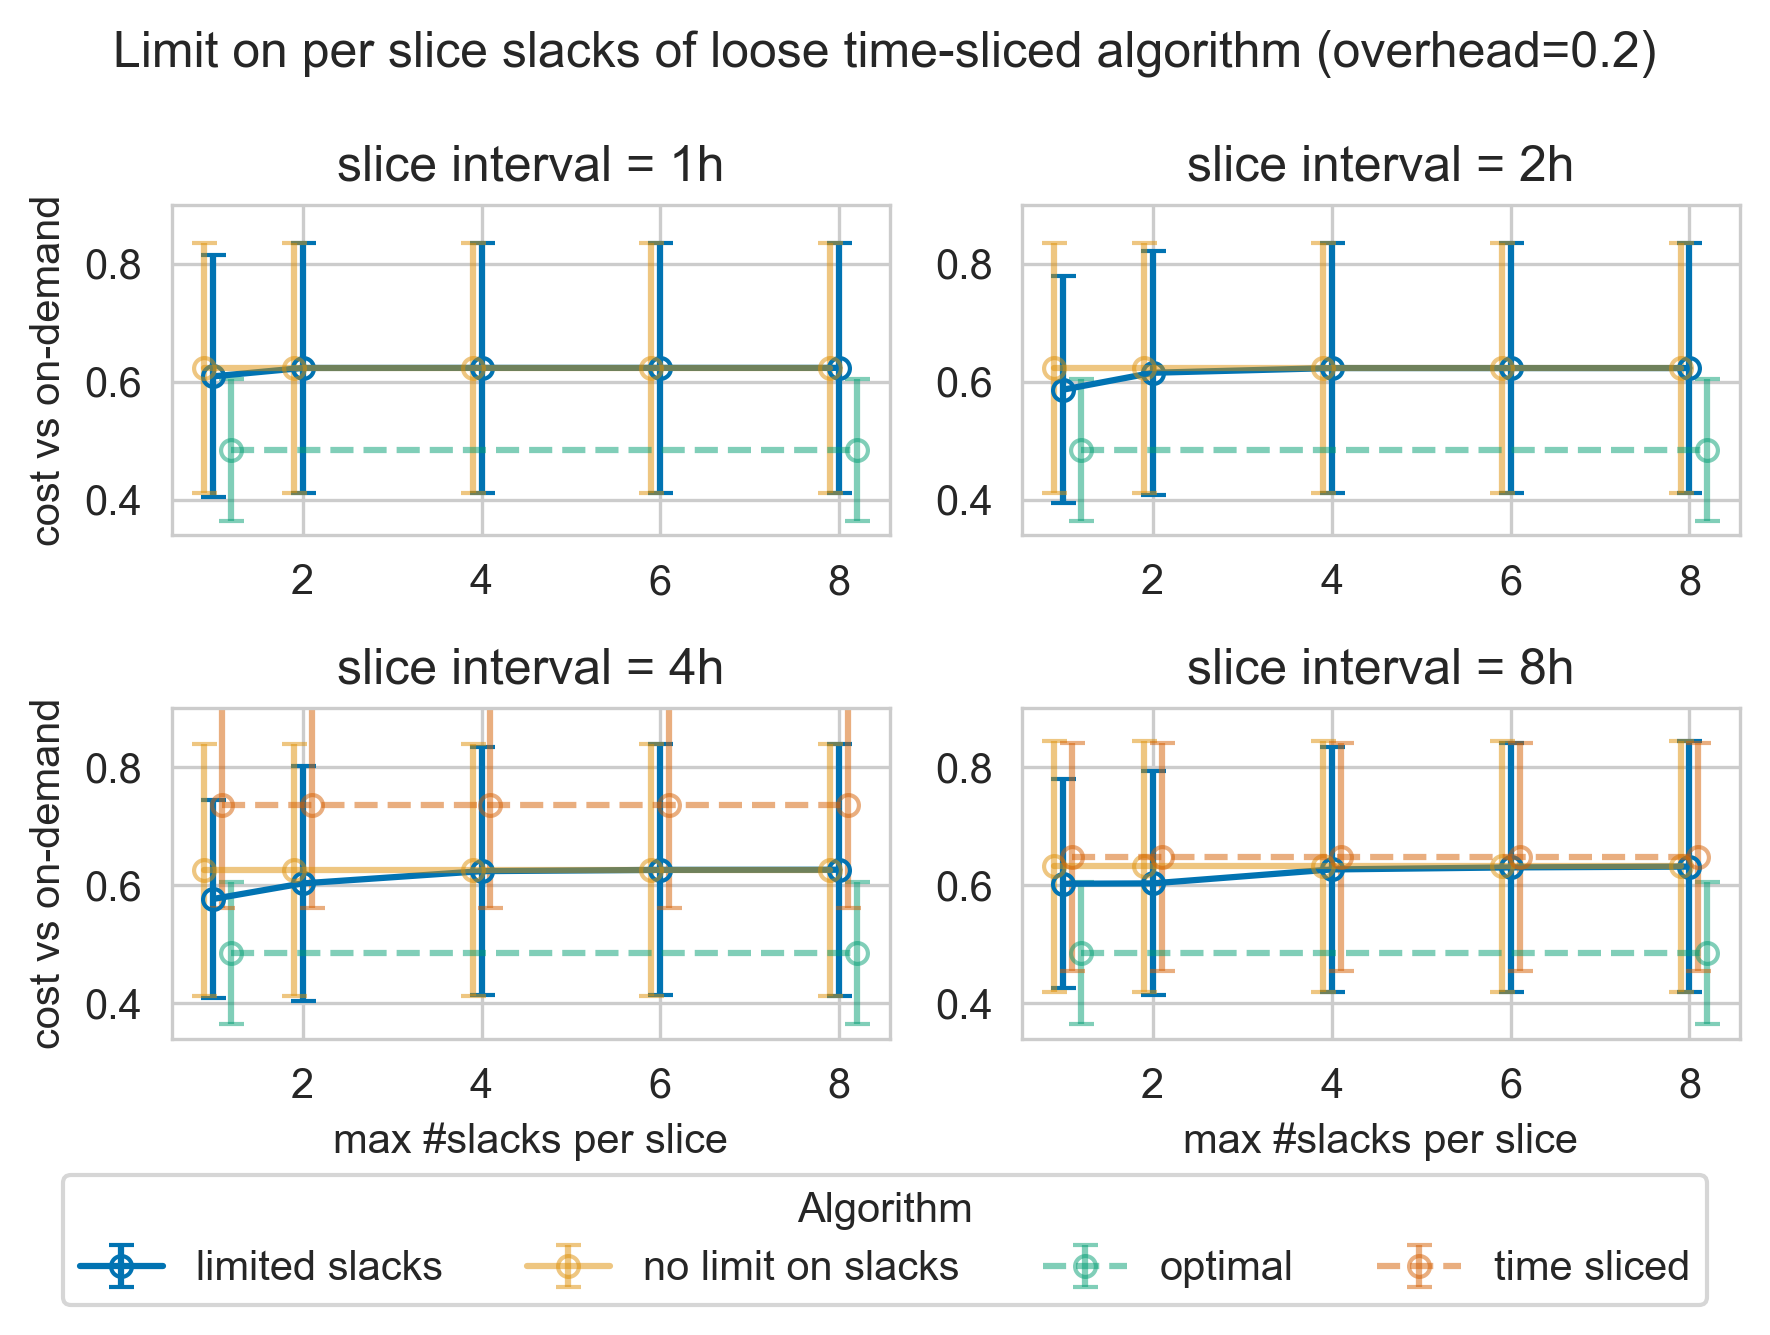

In [199]:
import numpy as np
palette = sns.color_palette('colorblind', 4)
SHIFT = 0.1
CAPSIZE = 3
fig = plt.figure(dpi=300, figsize=(6, 4))
slice_intervals = loose_time_sliced['slice interval'].unique()
slice_intervals = np.sort(slice_intervals)
print(slice_intervals)
slice_intervals = slice_intervals[:-1]
print(slice_intervals)
axes = fig.subplots((len(slice_intervals) + 1) // 2, 2)
for i, slice_interval in enumerate(slice_intervals):
    ax = axes[i // 2, i % 2]
    data = loose_time_sliced[loose_time_sliced['slice interval'] == slice_interval].sort_values('max slice slacks')
    ax.errorbar(x='max slice slacks',
                y='mean',
                yerr='std',
                alpha=1,
                color=palette[0],
                marker='o',
                markersize=5,
                markerfacecolor='none',
                capsize=CAPSIZE,
                data=data,
                label='limited slacks')

    origin_record = origin_loose_record[origin_loose_record['slice interval'] == slice_interval]
    origin_mean = origin_record['mean'].values[0]
    origin_std = origin_record['std'].values[0]
    ax.errorbar(
        x=np.array([1, 2, 4, 6, 8]) - SHIFT,
        y=[origin_mean] * 5,
        yerr=[origin_std] * 5,
        label='no limit on slacks',
        alpha=0.5,
        color=palette[1],
        marker='o',
        markersize=5,
        markerfacecolor='none',
        capsize=CAPSIZE,)
    ax.errorbar(
        x=np.array([1, 8]) + 2*SHIFT,
        y=[optimal['mean'].values[0]] * 2,
        yerr=[optimal['std'].values[0]] * 2,
        ls='--',
        label='optimal',
        alpha=0.5,
        color=palette[2],
        marker='o',
        markersize=5,
        markerfacecolor='none',
        capsize=CAPSIZE,
    )
    time_sliced_record = time_sliced[time_sliced['slice interval'] == slice_interval]
    ax.errorbar(
        x=np.array([1, 2, 4, 6, 8]) + SHIFT,
        y=[time_sliced_record['mean'].values[0]] * 5,
        yerr=[time_sliced_record['std'].values[0]] * 5,
        label='time sliced',
        alpha=0.5,
        color=palette[3],
        marker='o',
        markersize=5,
        markerfacecolor='none',
        capsize=CAPSIZE,
        ls='--'
        )
    ax.set_ylim(0.34, 0.9)
    ax.set_title(f'slice interval = {slice_interval}h')
    # ax.errorbar(x=np.arange(8), y=[optimal['mean'].values[0]] * 8, yerr=[optimal['std'].values[0]] * 8, alpha=0.5)


    # fig = plt.figure(dpi=300)
    # ax = fig.subplots()
    # sns.lineplot(x='max slice slacks',
    #              y='loose2time',
    #              hue='slice interval',
    #              data=merged,
    #              ax=ax)

for ax in axes[-1, :]:
    ax.set_xlabel('max #slacks per slice')
for ax in axes[:, 0]:
    ax.set_ylabel('cost vs on-demand')

handler_ax = axes[0, 0]
fig.legend(title='Algorithm', loc='lower center', ncol=4, handles=handler_ax.get_legend_handles_labels()[0], bbox_to_anchor=(0.5, -0.1))
fig.suptitle(f'Limit on per slice slacks of loose time-sliced algorithm (overhead={OVERHEAD})')
fig.tight_layout()


[ 1  2  4  8 16]
[1 2 4 8]
            algorithm  slice interval  use_avg  max slice slacks  \
9   loose_time_sliced               1    False               NaN   
10  loose_time_sliced               1    False               NaN   
11  loose_time_sliced               1    False               NaN   
12  loose_time_sliced               1    False               NaN   
13  loose_time_sliced               1    False               NaN   
3   loose_time_sliced               1    False               NaN   
4   loose_time_sliced               1    False               1.0   
5   loose_time_sliced               1    False               2.0   
6   loose_time_sliced               1    False               4.0   
7   loose_time_sliced               1    False               6.0   
8   loose_time_sliced               1    False               8.0   

    max total slacks  demand ratio      mean       p90       p95       std  \
9                8.0      0.408780  0.630371  0.959532  0.983049  0.217639   


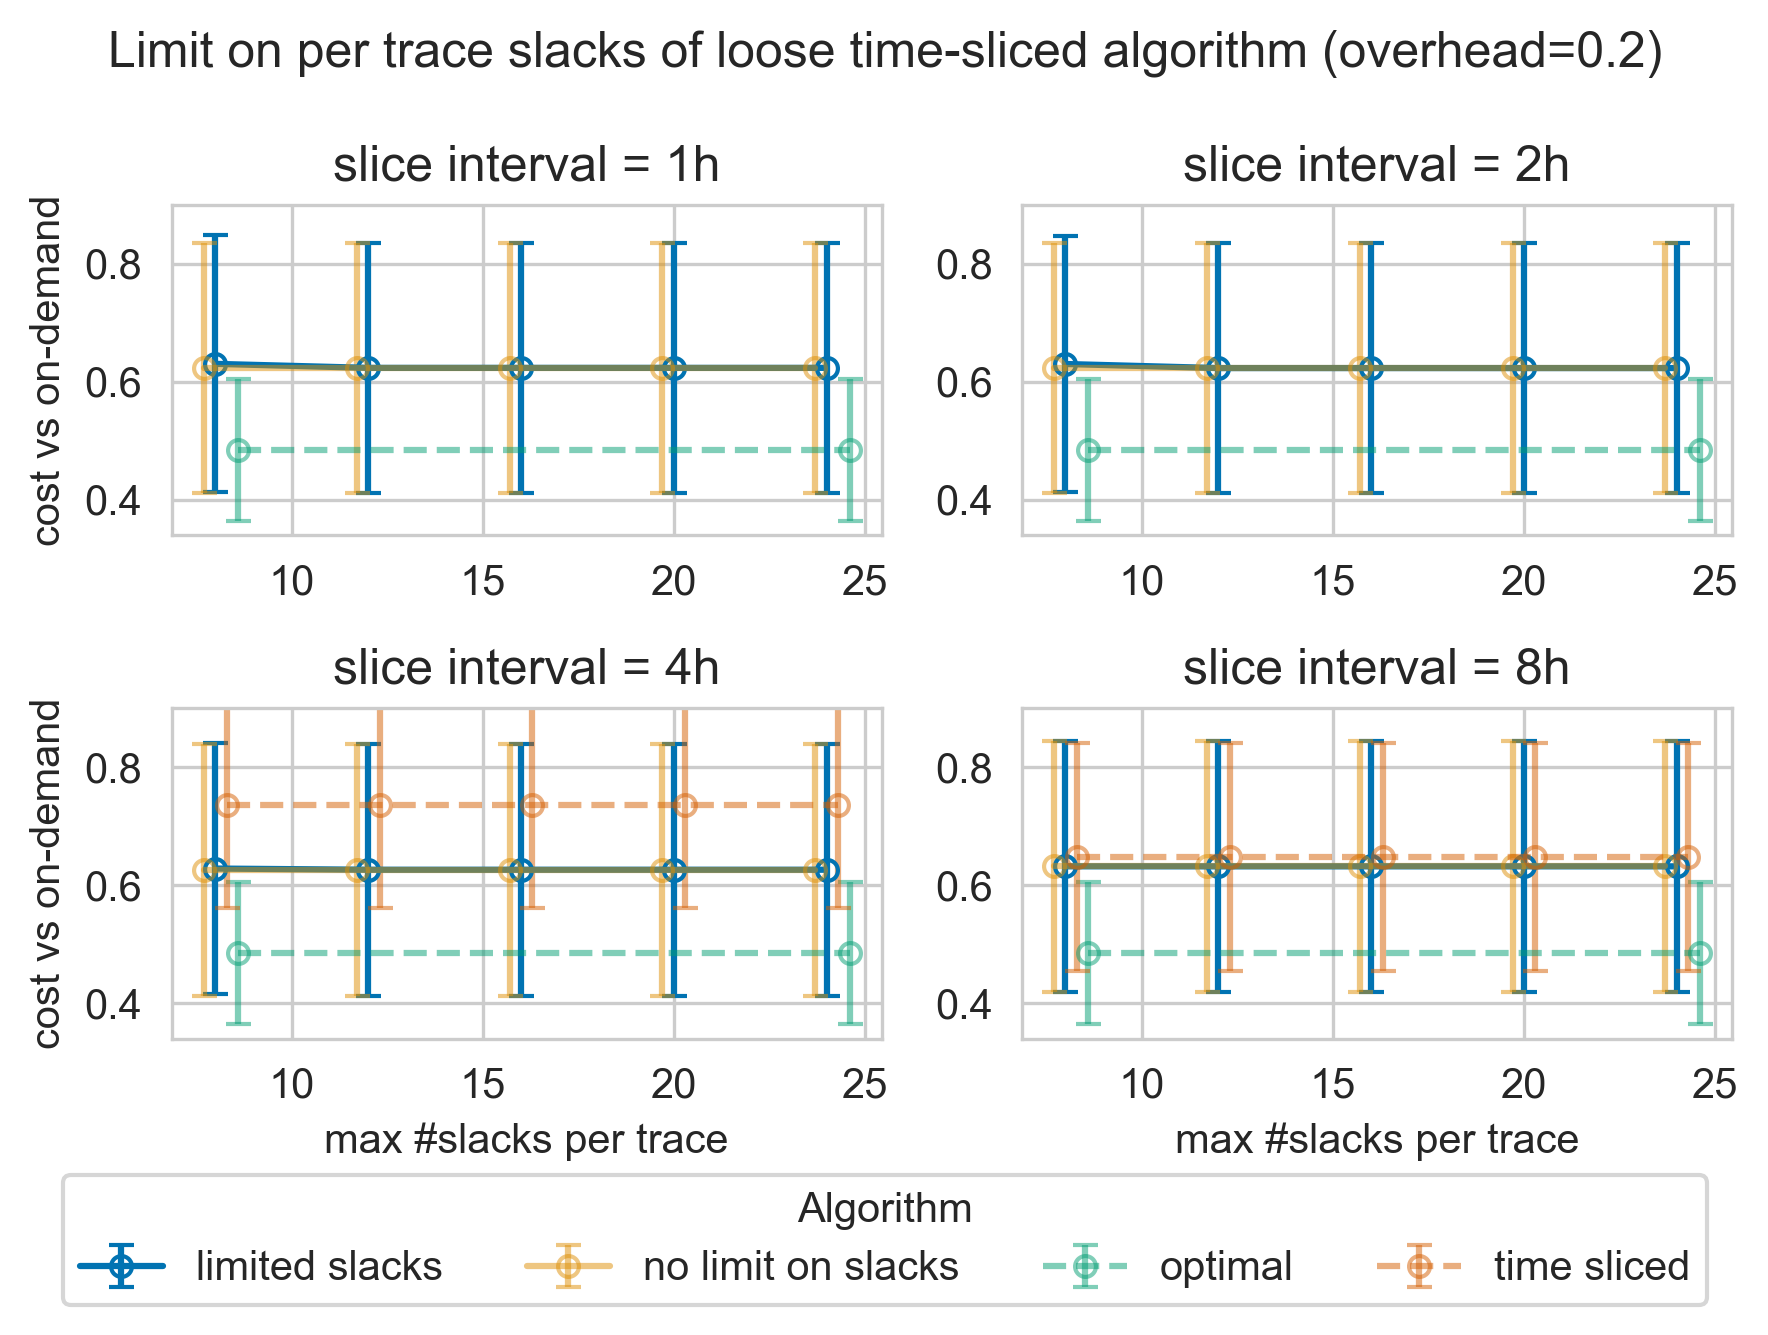

In [200]:
import numpy as np

palette = sns.color_palette('colorblind')
SHIFT = 0.3
CAPSIZE = 3
fig = plt.figure(dpi=300, figsize=(6, 4))
slice_intervals = loose_time_sliced['slice interval'].unique()
slice_intervals = np.sort(slice_intervals)
print(slice_intervals)
slice_intervals = slice_intervals[:-1]
print(slice_intervals)
axes = fig.subplots((len(slice_intervals) + 1) // 2, 2)
for i, slice_interval in enumerate(slice_intervals):
    ax = axes[i // 2, i % 2]
    data = loose_time_sliced[loose_time_sliced['slice interval'] ==
                             slice_interval].sort_values('max total slacks')
    print(data)
    ax.errorbar(x='max total slacks',
                y='mean',
                yerr='std',
                alpha=1,
                color=palette[0],
                marker='o',
                markersize=5,
                markerfacecolor='none',
                capsize=CAPSIZE,
                data=data,
                label='limited slacks')

    origin_record = origin_loose_record[origin_loose_record['slice interval']
                                        == slice_interval]
    origin_mean = origin_record['mean'].values[0]
    origin_std = origin_record['std'].values[0]
    ax.errorbar(
        x=data['max total slacks'].unique() - SHIFT,
        y=[origin_mean] * len(data['max total slacks'].unique()),
        yerr=[origin_std] * len(data['max total slacks'].unique()),
        label='no limit on slacks',
        alpha=0.5,
        color=palette[1],
        marker='o',
        markersize=5,
        markerfacecolor='none',
        capsize=CAPSIZE,
    )
    ax.errorbar(
        x=np.array([data['max total slacks'].min(), data['max total slacks'].max()]) + 2 * SHIFT,
        y=[optimal['mean'].values[0]] * 2,
        yerr=[optimal['std'].values[0]] * 2,
        ls='--',
        label='optimal',
        alpha=0.5,
        color=palette[2],
        marker='o',
        markersize=5,
        markerfacecolor='none',
        capsize=CAPSIZE,
    )
    time_sliced_record = time_sliced[time_sliced['slice interval'] ==
                                     slice_interval]
    print('hi')
    print(time_sliced_record['std'].values[0])
    ax.errorbar(x=data['max total slacks'].unique() + SHIFT,
                y=[time_sliced_record['mean'].values[0]] *
                len(data['max total slacks'].unique()),
                yerr=[time_sliced_record['std'].values[0]] *
                len(data['max total slacks'].unique()),
                label='time sliced',
                alpha=0.5,
                color=palette[3],
                marker='o',
                markersize=5,
                markerfacecolor='none',
                capsize=CAPSIZE,
                ls='--')
    ax.set_ylim(0.34, 0.9)
    ax.set_title(f'slice interval = {slice_interval}h')
    # ax.errorbar(x=np.arange(8), y=[optimal['mean'].values[0]] * 8, yerr=[optimal['std'].values[0]] * 8, alpha=0.5)

    # fig = plt.figure(dpi=300)
    # ax = fig.subplots()
    # sns.lineplot(x='max slice slacks',
    #              y='loose2time',
    #              hue='slice interval',
    #              data=merged,
    #              ax=ax)

for ax in axes[-1, :]:
    ax.set_xlabel('max #slacks per trace')
for ax in axes[:, 0]:
    ax.set_ylabel('cost vs on-demand')

handler_ax = axes[0, 0]
fig.legend(title='Algorithm',
           loc='lower center',
           ncol=4,
           handles=handler_ax.get_legend_handles_labels()[0],
           bbox_to_anchor=(0.5, -0.1))
fig.suptitle(f'Limit on per trace slacks of loose time-sliced algorithm (overhead={OVERHEAD})')
fig.tight_layout()
